In [1]:
pip install --upgrade scikit-learn

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor

In [3]:
df = pd.read_excel("/content/drive/MyDrive/Dataset/Sample - Superstore3.xlsx")
print(df.head())

   Row ID        Order ID Order Date  Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
1       2  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
2       3  CA-2016-138688 2016-06-12 2016-06-16    Second Class    DV-13045   
3       4  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   
4       5  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \
0       42420   South  FUR-BO-10

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [5]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df = df.sort_values(by='Order Date')

In [6]:
df['UnitPrice'] = df['Sales'] / df['Quantity']

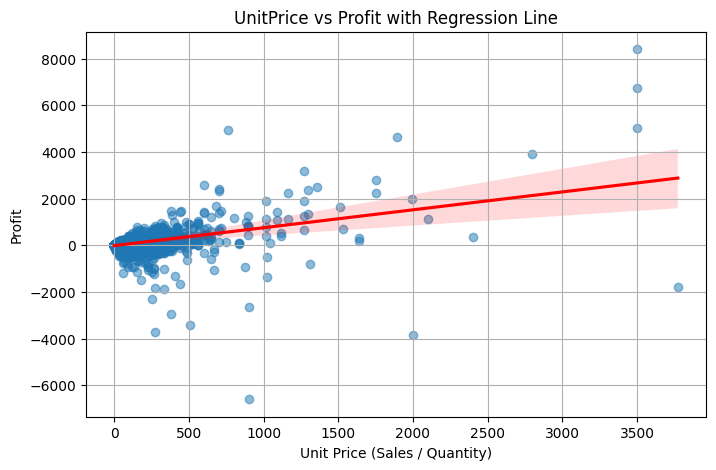

In [7]:
plt.figure(figsize=(8, 5))
sns.regplot(data=df, x='UnitPrice', y='Profit', scatter_kws={'alpha':0.5}, line_kws={"color":"red"})
plt.title('UnitPrice vs Profit with Regression Line')
plt.xlabel('Unit Price (Sales / Quantity)')
plt.ylabel('Profit')
plt.grid(True)
plt.show()

Dari hasil analisis data penjualan, terlihat bahwa kenaikan harga per unit cenderung meningkatkan profit, namun dengan risiko tertentu. Model menunjukkan tren positif, tetapi ada titik di mana profit menurun — kemungkinan karena harga terlalu tinggi dan mengurangi permintaan

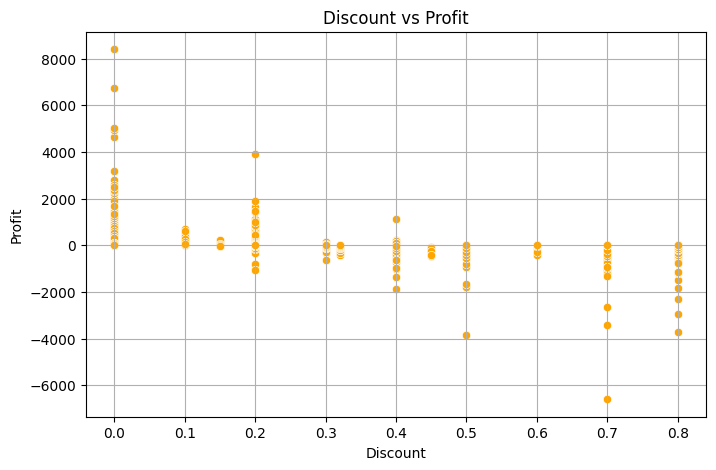

In [8]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Discount', y='Profit', color='orange')
plt.title('Discount vs Profit')
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.grid(True)
plt.show()

Berdasarkan data, pemberian diskon yang terlalu besar di atas 30% berisiko tinggi menyebabkan kerugian. Strategi promosi sebaiknya fokus pada diskon kecil hingga sedang ≤ 20% yang masih memberi peluang keuntungan. Untuk produk dengan daya tarik tinggi, bahkan tanpa diskon pun bisa sangat menguntungkan.

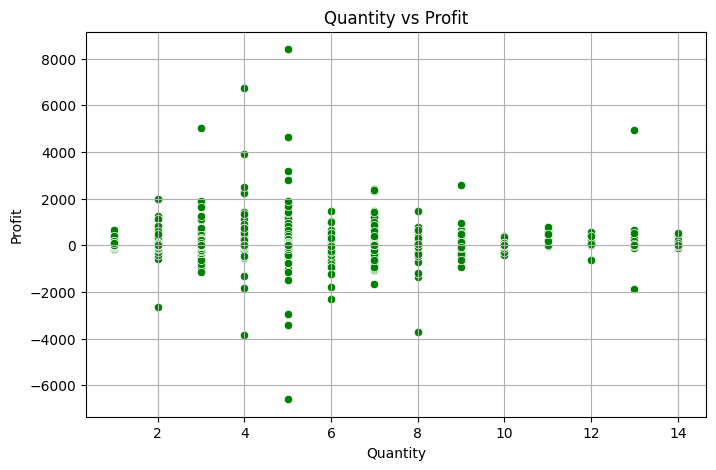

In [9]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Quantity', y='Profit', color='green')
plt.title('Quantity vs Profit')
plt.xlabel('Quantity')
plt.ylabel('Profit')
plt.grid(True)
plt.show()

In [10]:
# Pastikan sudah dalam format datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Split berdasarkan tahun
train_df = df[df['Order Date'] < '2017-01-01']
test_df = df[df['Order Date'] >= '2017-01-01']

In [11]:
# Ambil hanya kolom numerik
numeric_cols = df.select_dtypes(include='number').columns

# Iterasi untuk setiap kolom numerik dan hapus outlier berdasarkan IQR
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower) & (df[col] <= upper)]

In [12]:
train_df['UnitPrice'] = train_df['Sales'] / train_df['Quantity']
test_df['UnitPrice'] = test_df['Sales'] / test_df['Quantity']

# Fitur yang akan dipakai
features = ['UnitPrice', 'Discount', 'Quantity']
target = 'Profit'

X_train = train_df[features]
y_train = train_df[target]
X_test = test_df[features]
y_test = test_df[target]

<ipython-input-12-b5950b529975>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['UnitPrice'] = train_df['Sales'] / train_df['Quantity']
<ipython-input-12-b5950b529975>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['UnitPrice'] = test_df['Sales'] / test_df['Quantity']


In [13]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Regression linear

In [14]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

print("Linear Regression (with scaling)")
print("MAE:", mean_absolute_error(y_test, y_pred_lr))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print("R2 Score:", r2_score(y_test, y_pred_lr))

Linear Regression (with scaling)
MAE: 61.067755869830776
RMSE: 199.07229045833407
R2 Score: 0.3223443164676083


Random forest

SVR

In [15]:
# SVR Model
svr = SVR(kernel='rbf')
svr.fit(X_train_scaled, y_train)
y_pred_svr = svr.predict(X_test_scaled)

print("Support Vector Regression:")
print("MAE:", mean_absolute_error(y_test, y_pred_svr))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_svr)))
print("R2 Score:", r2_score(y_test, y_pred_svr))

Support Vector Regression:
MAE: 45.668419744292216
RMSE: 234.11739117132564
R2 Score: 0.06275137811749543


XG Boost

In [16]:
# Inisialisasi dan latih model XGBoost
model = XGBRegressor(objective='reg:squarederror', random_state=42)
model.fit(X_train_scaled, y_train)

# Prediksi
y_pred = model.predict(X_test_scaled)

# Evaluasi
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("XGBoost Regressor Performance:")
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R² Score: {r2}")

XGBoost Regressor Performance:
MAE: 29.722118579080078
RMSE: 155.3905887764601
R² Score: 0.5871076057542939


Random Forest

In [17]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)

y_pred_rf = rf.predict(X_test_scaled)

print("Random Forest Regressor:")
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print("R2 Score:", r2_score(y_test, y_pred_rf))


Random Forest Regressor:
MAE: 25.286285059250424
RMSE: 118.61057624573708
R2 Score: 0.7594339761130093


MLP Regressor

In [18]:
mlp = MLPRegressor(hidden_layer_sizes=(64, 32), max_iter=500, random_state=42)
mlp.fit(X_train_scaled, y_train)
y_pred_mlp = mlp.predict(X_test_scaled)

print("MLP Regressor:")
print("MAE:", mean_absolute_error(y_test, y_pred_mlp))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_mlp)))
print("R2 Score:", r2_score(y_test, y_pred_mlp))


MLP Regressor:
MAE: 31.030945599772412
RMSE: 103.55325944452636
R2 Score: 0.8166356070176917


Pakai model MLP Regressor untuk memprediksi keuntung berdasarkan kenaikan harga

Actual vs Prediksi

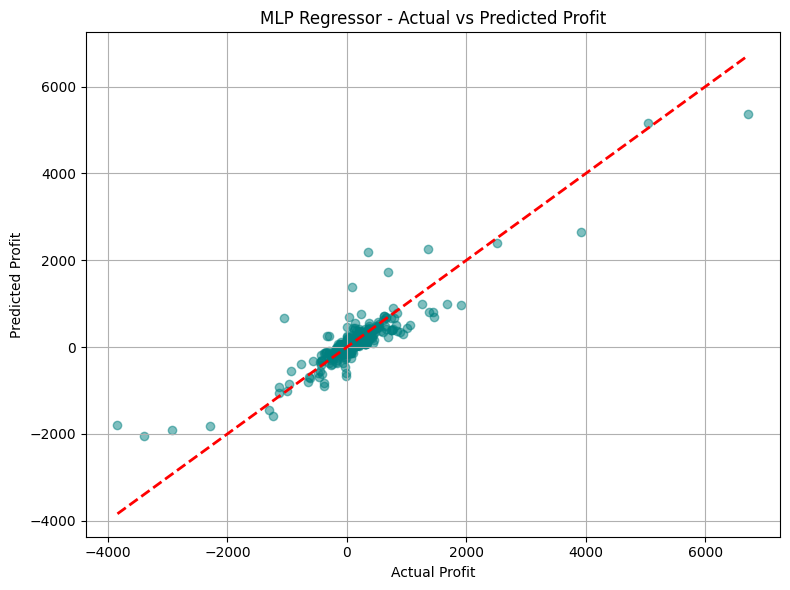

In [19]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_mlp, alpha=0.5, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Profit')
plt.ylabel('Predicted Profit')
plt.title('MLP Regressor - Actual vs Predicted Profit')
plt.grid(True)
plt.tight_layout()
plt.show()

Insight dari Grafik Ini

*  Model cukup baik dalam memprediksi profit, terutama pada rentang profit yang umum (antara -1000 sampai 2000).
*   Model kesulitan memprediksi keuntungan yang sangat tinggi atau sangat rendah secara akurat.
*   Tidak ada bias berat ke atas atau ke bawah, model cukup seimbang.



Error Distribution

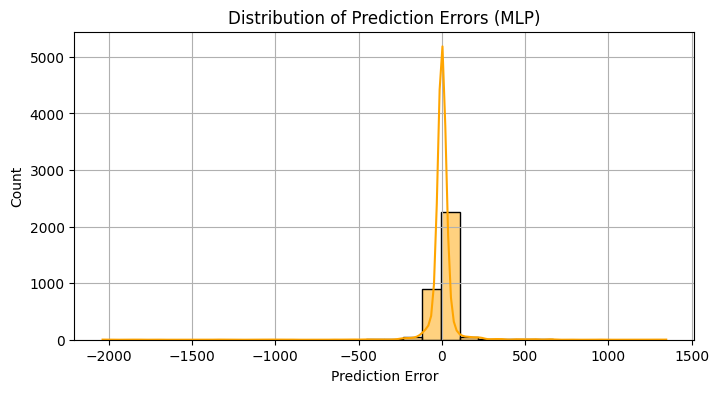

In [20]:
errors = y_test - y_pred_mlp
plt.figure(figsize=(8, 4))
sns.histplot(errors, bins=30, kde=True, color='orange')
plt.title('Distribution of Prediction Errors (MLP)')
plt.xlabel('Prediction Error')
plt.grid(True)
plt.show()


Residual Plot

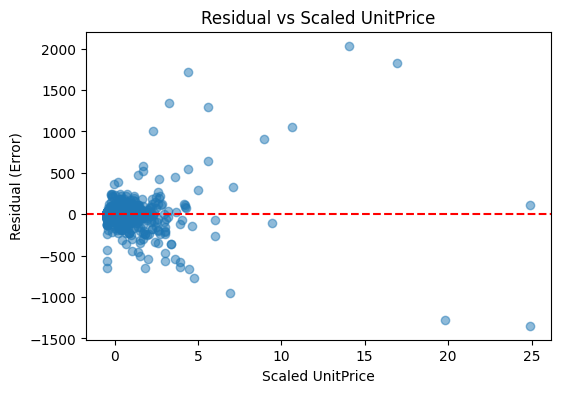

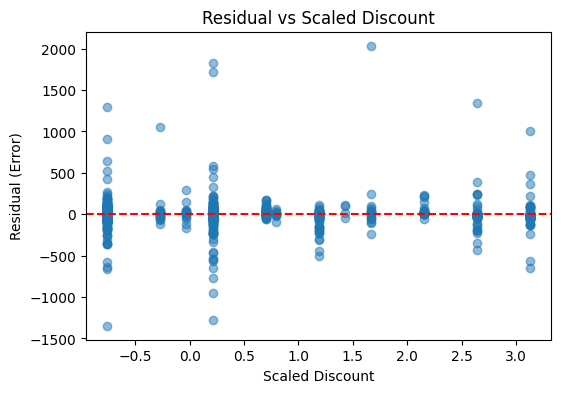

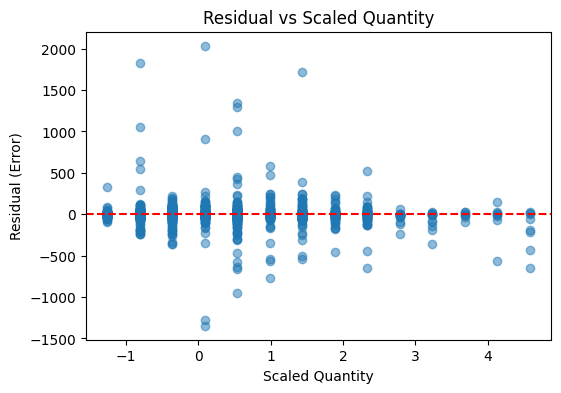

In [21]:
feature_names = ['UnitPrice', 'Discount', 'Quantity']

for i in range(X_test_scaled.shape[1]):
    plt.figure(figsize=(6, 4))
    plt.scatter(X_test_scaled[:, i], y_pred_mlp - y_test, alpha=0.5)
    plt.axhline(0, color='red', linestyle='--')
    plt.xlabel(f'Scaled {feature_names[i]}')
    plt.ylabel('Residual (Error)')
    plt.title(f'Residual vs Scaled {feature_names[i]}')
    plt.show()